In [46]:
import numpy as np
from keras.datasets import mnist

Loading dataset in Keras

In [47]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
print(np.shape(train_labels))

(60000,)


In [4]:
train_images[0][0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=uint8)

Network architecture

In [5]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation = 'relu', input_shape = (28 * 28,)))
network.add(layers.Dense(10, activation = 'softmax'))

Instructions for updating:
Colocations handled automatically by placer.


Compilation step

In [6]:
network.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

Preparing the image data

In [7]:

train_images = train_images.reshape(60000, 28 * 28)
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32')/255



In [8]:
print(train_labels)

[5 0 4 ... 5 6 8]


preparing labels

In [9]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
print(train_labels.shape)

(60000, 10)


In [10]:
print(train_labels)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


fit network

In [11]:
network.fit(train_images, train_labels, epochs=5, batch_size = 128)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
60000/60000 [==============================] - 11s 185us/step - loss: 0.2600 - acc: 0.9254
Epoch 2/5
60000/60000 [==============================] - 10s 159us/step - loss: 0.1056 - acc: 0.9687
Epoch 3/5
60000/60000 [==============================] - 9s 144us/step - loss: 0.0685 - acc: 0.9793
Epoch 4/5
60000/60000 [==============================] - 10s 164us/step - loss: 0.0496 - acc: 0.9852
Epoch 5/5
60000/60000 [==============================] - 8s 138us/step - loss: 0.0377 - acc: 0.9883


Test how well the model performs

In [12]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)
print('test_loss', test_loss)

10000/10000 [==============================] - 1s 67us/step
test_acc: 0.9808
test_loss 0.06339597257787827


In the book they claimed to be 2,354 gradient updates (469 per epoch), and i'm not sure why?

In [15]:
test_loss.ndim
train_images.shape

(60000, 784)

In [5]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


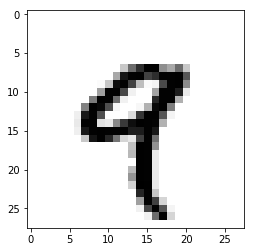

In [10]:
import matplotlib.pyplot as plt
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()